In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('Amazon Data.csv')

In [54]:
print(data.head())
print(data.info())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  28-May-10  669165933  27-Jun-10        9925   
1        Online              C  22-Aug-12  963881480  15-Sep-12        2804   
2       Offline              L  05-Feb-14  341417157  05-Aug-14        1779   
3        Online              C  20-Jun-14  514321792  07-May-14        8102   
4       Offline              L  02-Jan-13  115456712  02-Jun-13        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%b-%y')
data['Sales'] = data['Total Revenue']  # Assuming 'Total Revenue' represents sales
data['Region'] = data['Region'].str.strip()  # Remove any leading/trailing whitespaces
data['Country'] = data['Country'].str.strip()


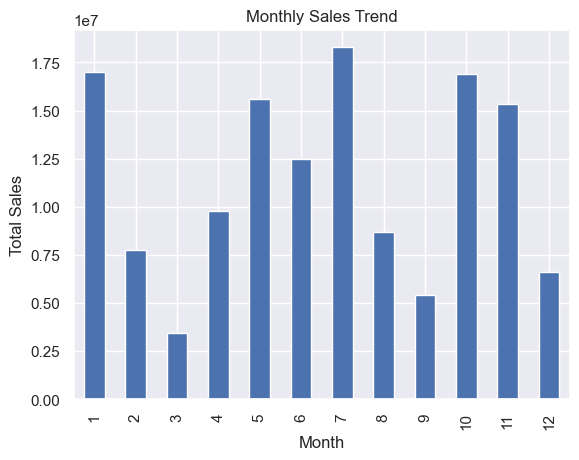

In [56]:
# Analyze Sales Trends

# Month-wise sales trend
monthly_sales = data.groupby(data['Order Date'].dt.month)['Sales'].sum()
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Sales', title='Monthly Sales Trend')
plt.show()

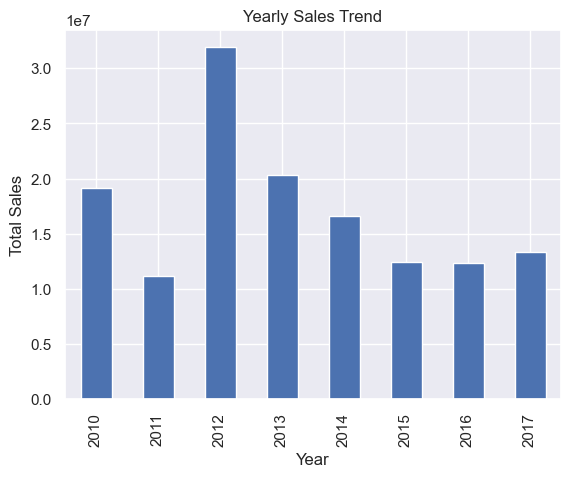

In [57]:
# Year-wise sales trend
yearly_sales = data.groupby(data['Order Date'].dt.year)['Sales'].sum()
yearly_sales.plot(kind='bar', xlabel='Year', ylabel='Total Sales', title='Yearly Sales Trend')
plt.show()

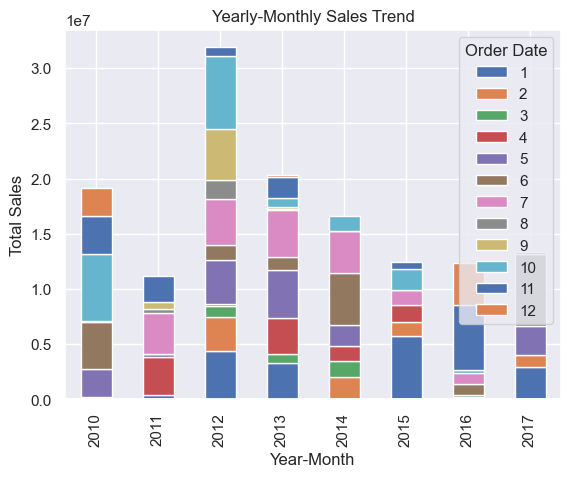

In [58]:
# Yearly-month-wise sales trend
yearly_monthly_sales = data.groupby([data['Order Date'].dt.year, data['Order Date'].dt.month])['Sales'].sum()
yearly_monthly_sales.unstack().plot(kind='bar', stacked=True, xlabel='Year-Month', ylabel='Total Sales', title='Yearly-Monthly Sales Trend')
plt.show()

In [59]:
# Correlation matrix to find relationships between numerical attributes
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)


               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   
Sales         -0.314688    0.447784    0.752360   0.715623       1.000000   

               Total Cost  Total Profit     Sales  
Order ID        -0.328944     -0.234638 -0.314688  
Units Sold       0.374746      0.564550  0.447784  
Unit Price       0.787905      0.557365  0.752360  
Unit Cost        0.774895      0.467214  0.715623  
Total Revenue    0.983928      0.897327  1.000

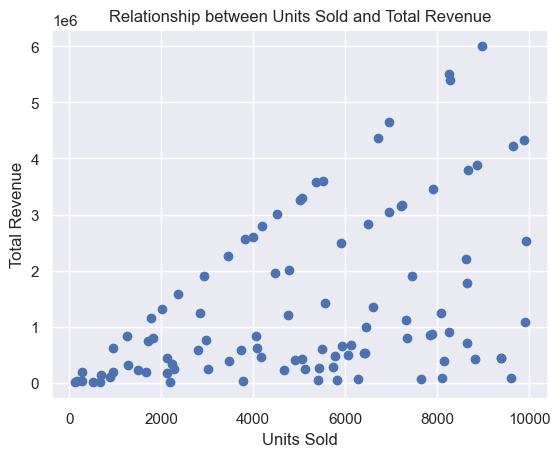

In [60]:
# Example:
# Scatter plot to visualize relationship between two numerical attributes
plt.scatter(data['Units Sold'], data['Total Revenue'])
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Relationship between Units Sold and Total Revenue')
plt.show()

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

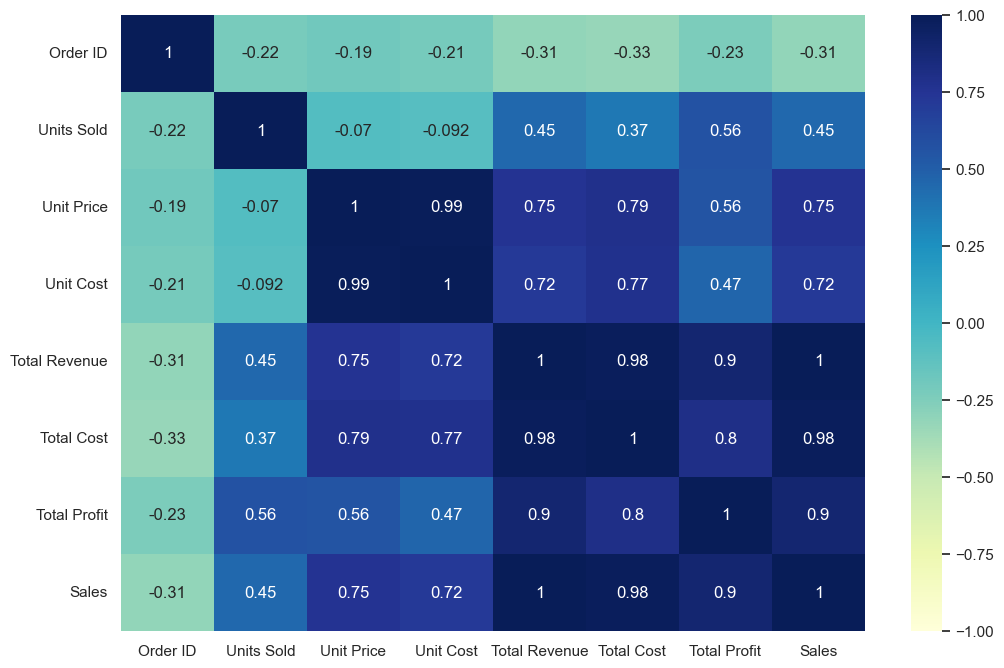

In [62]:
# Get numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')
plt.show()


In [63]:
sns.set(style = 'darkgrid')


In [64]:
# Assuming you have loaded a dataset into sales_data01 DataFrame
sales_data01 = pd.read_csv('Amazon Data.csv')


In [65]:
print(sales_data01.columns)


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [66]:
DaySalesInsights = sales_data01.copy()





In [67]:
DaySalesInsights['Invoice_Date'] = pd.to_datetime(sales_data01['Order Date'], format='%d-%b-%y').dt.date


In [68]:
top10sales = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Total Revenue', ascending=False)
top10sales = top10sales.reset_index().head(10)


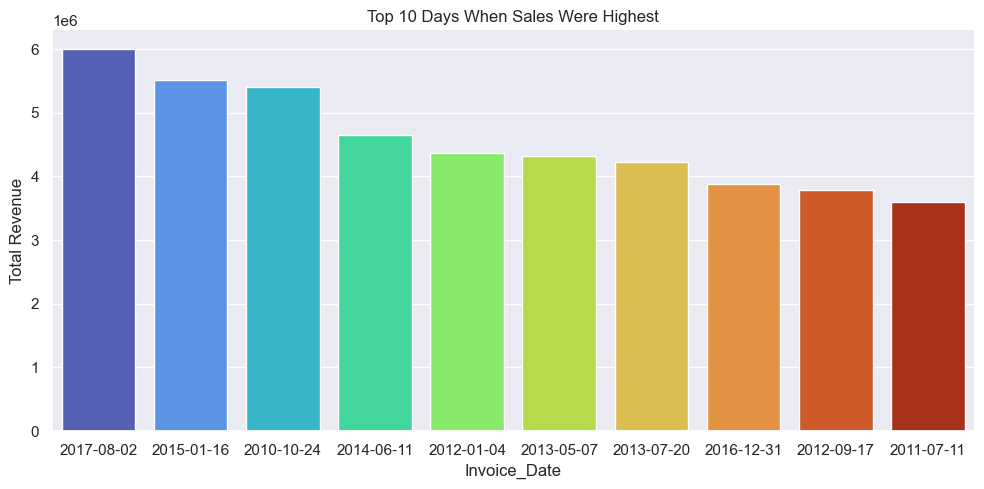

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='Total Revenue', x='Invoice_Date', data=top10sales, aspect=2, hue='Invoice_Date', legend=False, palette='turbo', kind="bar")
plt.title('Top 10 Days When Sales Were Highest')
plt.show()


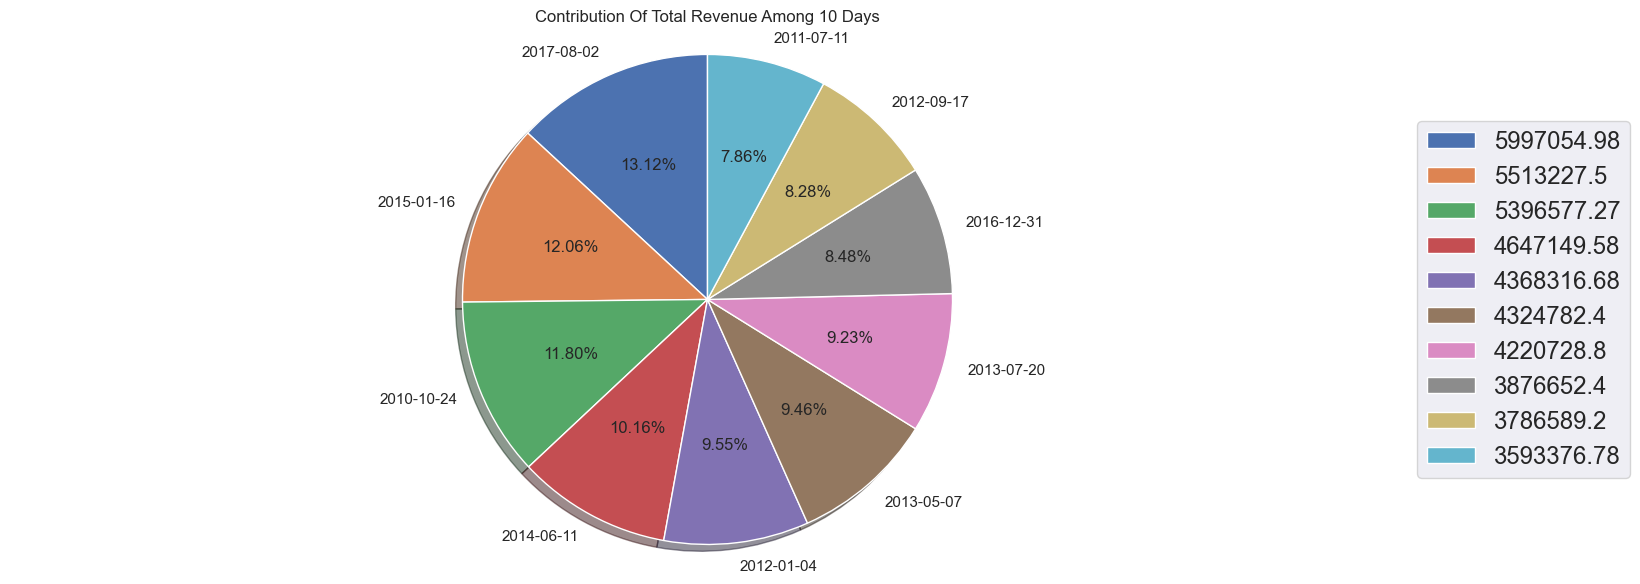

In [70]:
plt.figure(figsize=(18, 7))
plt.pie(top10sales['Total Revenue'], labels=top10sales['Invoice_Date'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Contribution Of Total Revenue Among 10 Days')
plt.legend(top10sales['Total Revenue'], loc='center left', fontsize='x-large', bbox_to_anchor=(1, 0.5))
plt.show()


In [71]:
top10profits = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Total Profit', ascending=False)
top10profits = top10profits.reset_index().head(10)


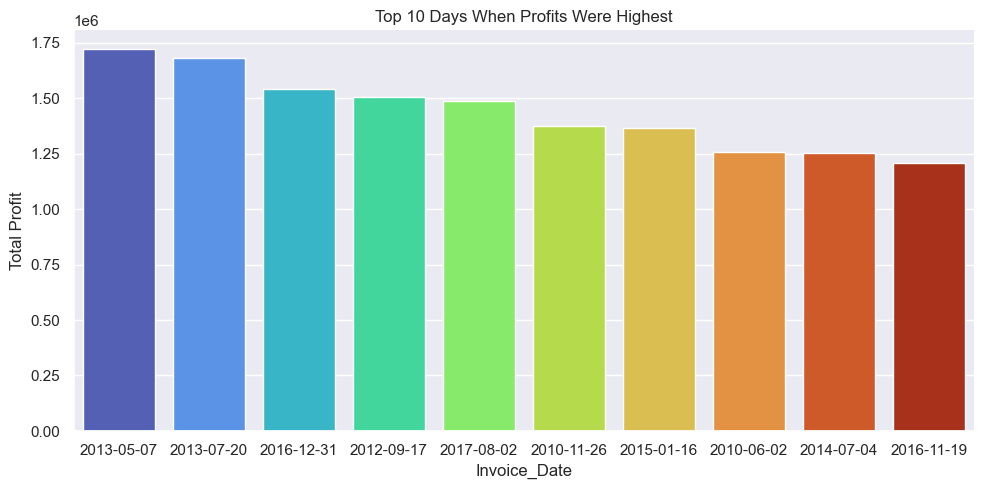

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='Total Profit', x='Invoice_Date', data=top10profits, aspect=2, hue='Invoice_Date', legend=False, palette='turbo', kind="bar")
plt.title('Top 10 Days When Profits Were Highest')
plt.show()


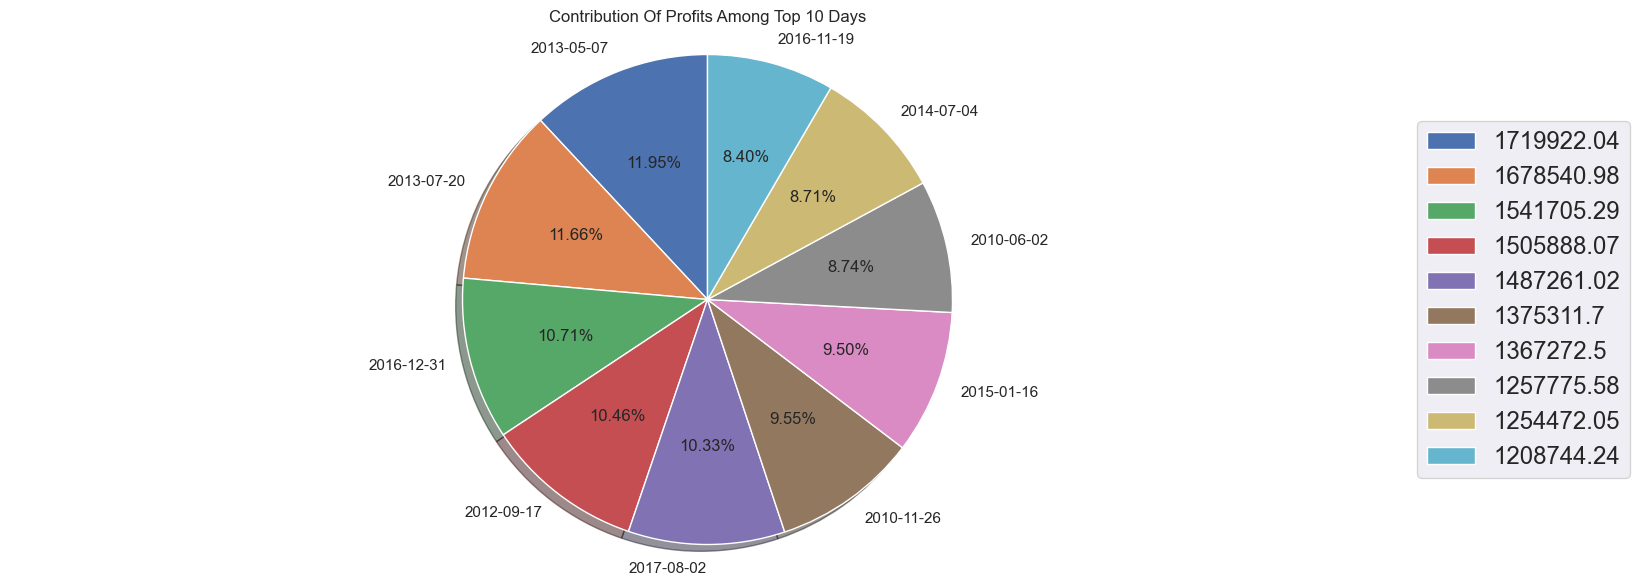

In [73]:
plt.figure(figsize=(18, 7))
plt.pie(top10profits['Total Profit'], labels=top10profits['Invoice_Date'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Contribution Of Profits Among Top 10 Days')
plt.legend(top10profits['Total Profit'], loc='center left', fontsize='x-large', bbox_to_anchor=(1, 0.5))
plt.show()


In [74]:
highqty = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Units Sold', ascending=False)
highqty = highqty.reset_index().head(10)


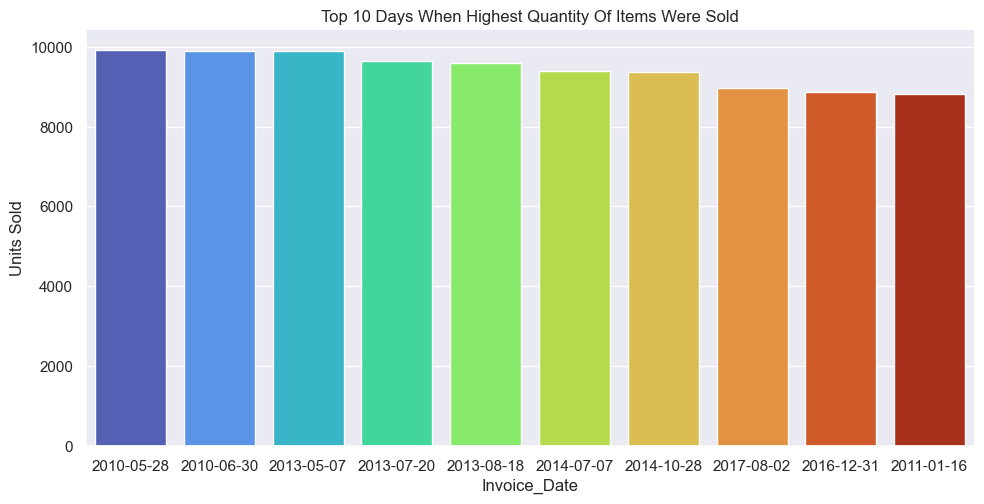

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='Units Sold', x='Invoice_Date', data=highqty, aspect=2, hue='Invoice_Date', legend=False, palette='turbo', kind="bar")
plt.title('Top 10 Days When Highest Quantity Of Items Were Sold')
plt.show()


In [76]:
MostCust = DaySalesInsights.groupby('Invoice_Date').size().reset_index(name='CustomerCount').sort_values('CustomerCount', ascending=False).head(10)


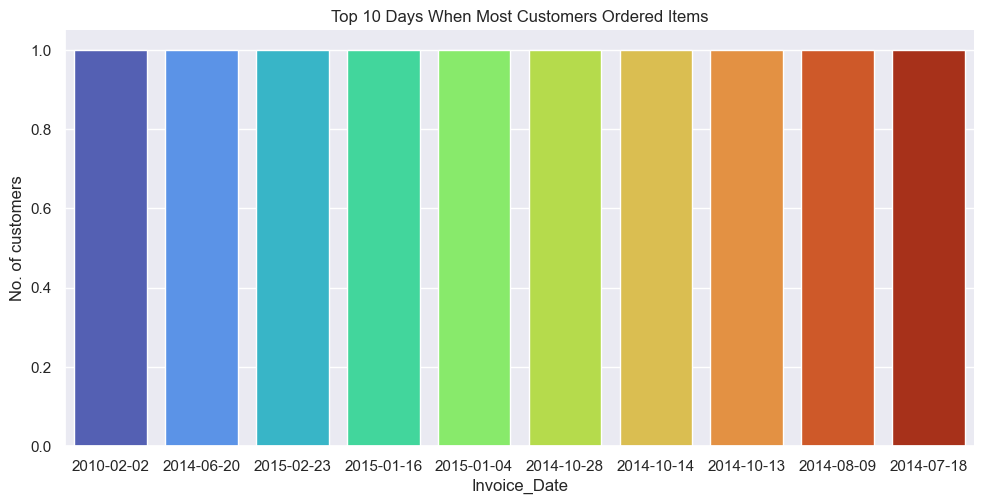

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='CustomerCount', x='Invoice_Date', data=MostCust, aspect=2, hue='Invoice_Date', legend=False, palette='turbo', kind="bar")
plt.title('Top 10 Days When Most Customers Ordered Items')
plt.ylabel('No. of customers')
plt.show()


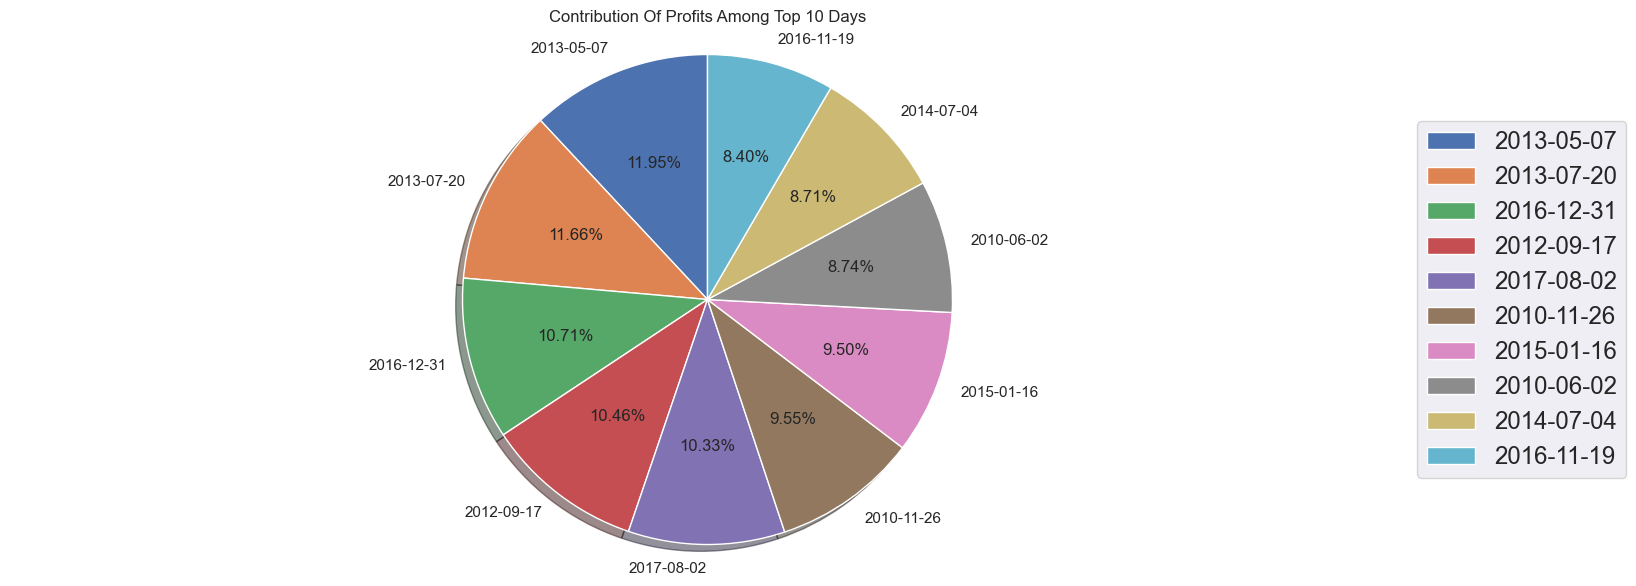

In [78]:
plt.figure(figsize=(18, 7))
plt.pie(top10profits['Total Profit'], labels=top10profits['Invoice_Date'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Contribution Of Profits Among Top 10 Days')
plt.legend(labels=top10profits['Invoice_Date'], loc='center left', fontsize='x-large', bbox_to_anchor=(1, 0.5))
plt.show()
